In [2]:
import pandas as pd
import glob
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('data/features.csv')
features = ['MEAN_MOTION', 'ECCENTRICITY', 'INCLINATION', 'BSTAR']


In [4]:
X = data[features]
y = data['days_to_decay']
y

0           4
1           4
2           0
3           0
4           0
         ... 
861980    511
861981    510
861982    511
861983    511
861984    510
Name: days_to_decay, Length: 861985, dtype: int64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [7]:
y_pred = rf_model.predict(X_test)

In [8]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Random Forest Test Set MAE: {mae:.2f} days')
print(f'Random Forest Test Set R2: {r2:.2f}')

Random Forest Test Set MAE: 2.27 days
Random Forest Test Set R2: 1.00


In [10]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_mae_scores = cross_val_score(rf_model, X, y, cv=kf, scoring='neg_mean_absolute_error')
print(f'Cross-Validated MAE per fold: {-cv_mae_scores}')
print(f'Average Cross-Validated MAE: {-cv_mae_scores.mean():.2f} days')

Cross-Validated MAE per fold: [2.27494778 2.30268764 2.28356293 2.26134227 2.30028286]
Average Cross-Validated MAE: 2.28 days


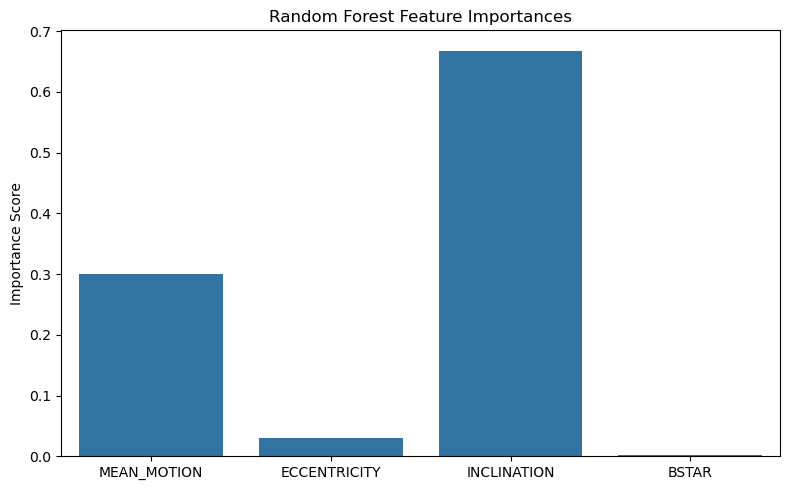

In [12]:
importances = rf_model.feature_importances_
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x=features, y=importances, ax=ax)
ax.set_title('Random Forest Feature Importances')
ax.set_ylabel('Importance Score')
plt.tight_layout()


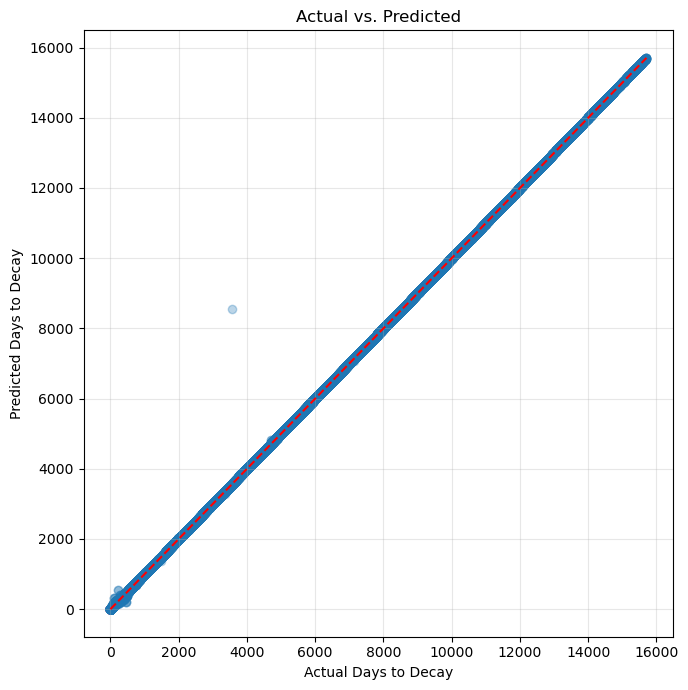

In [ ]:
# Actual vs Predicted Scatter Plot
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(y_test, y_pred, alpha=0.3)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
ax.set_xlabel('Actual Days to Decay')
ax.set_ylabel('Predicted Days to Decay')
ax.set_title('Actual vs. Predicted')
ax.grid(True, alpha=0.3)
plt.tight_layout()

<Axes: xlabel='days_to_decay', ylabel='Count'>

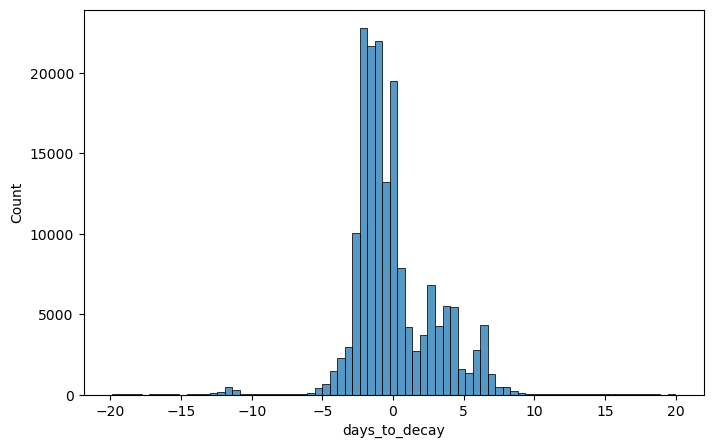

In [21]:
# Residuals Histogram
residuals = y_test - y_pred
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(residuals[(residuals > -20) & (residuals < 20)], bins=75, ax=ax)

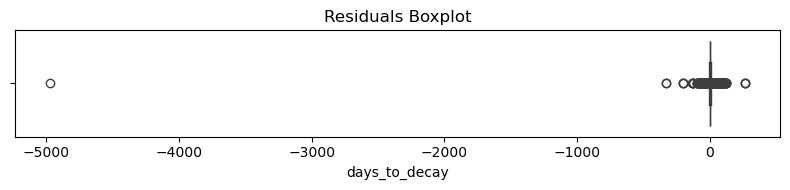

In [22]:
fig, ax = plt.subplots(figsize=(8, 2))
sns.boxplot(x=residuals, ax=ax)
ax.set_title('Residuals Boxplot')
plt.tight_layout()
plt.show()